<a href="https://colab.research.google.com/github/turatsinzejunior83/.net-apps/blob/master/Detection_of_Maleware_Androind_Application_Using_Machine_Learning(ML).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Description:**

The Android Malware Detection Dataset is derived from the NATICUSdroid (Android Permissions) Dataset, a comprehensive collection of Android application data focused on permissions requested by these applications. This dataset aims to facilitate research in the domain of mobile security and privacy by providing detailed information about the permissions sought by various Android applications.

**Dataset Details:**

Permission Categories: The dataset includes permissions spanning various categories, such as camera access, location services, storage access, network connectivity, etc.

With the popularity of Android devices, the number of applications made for the android operating system is also increasing day by day. But the biggest challenge in this scenario is to identify if an application is an authentic application or a malware. This project tries to identify an application as malware/not based on the permissions required by the application

The dataset given here is taken from Kaggle and consists of about 331 features which are the different android permissions asked by the application (0 denotes not required and 1 denotes required). The no rows/malware readings for each permission is 398. It is the ‘type’ label which represents a given row corresponding to whether an application is malware or not.

**Tasks:**

1.Write a Data Science Proposal for achieving the objective mentioned.

2.Perform exploratory analysis on the data and describe your understanding of the data.

3.Perform data wrangling / pre-processing on the data if required a. E.g., missing data, normalization, discretization, etc.

4.Apply any two feature engineering techniques.

5.Plot top 10 features.

6.Implement any two Machine Learning models (SVM or Decision Tree or Random Forest or kNN or Naïve Bayes etc)

7.Compare the performance of the two models. Provide a table for comparison. (Here you may use the combination of FE1+ML1, FE1+ML2, FE2+ML1 and FE2+ML2 etc)

8.Present the conclusions/results in the format shared.

**Import packages**

In [2]:
from sklearn.naive_bayes import GaussianNB, BernoulliNB
from sklearn.metrics import accuracy_score, classification_report
from sklearn.ensemble import BaggingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import cohen_kappa_score
from sklearn.metrics import confusion_matrix
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt
from sklearn import preprocessing
import torch
from sklearn import svm
from sklearn import tree
import pandas as pd
import pickle
import numpy as np
import seaborn as sns
from sklearn.tree import DecisionTreeClassifier
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
from sklearn import tree

In [3]:
pip install category_encoders

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.9/81.9 kB 1.1 MB/s eta 0:00:00


In [4]:
import category_encoders as ce

**Task 2: Load Data**

In [5]:
df = pd.read_csv("/content/Android_Malware.csv", sep=";")
df.shape
df.columns = map(str.lower, df.columns)

**Task 3: Exploratory Analysis**

In [6]:
for column in df.columns.tolist():

  print(column)

android.permission.get_accounts,com.sonyericsson.home.permission.broadcast_badge,android.permission.read_profile,android.permission.manage_accounts,android.permission.write_sync_settings,android.permission.read_external_storage,android.permission.receive_sms,com.android.launcher.permission.read_settings,android.permission.write_settings,com.google.android.providers.gsf.permission.read_gservices,android.permission.download_without_notification,android.permission.get_tasks,android.permission.write_external_storage,android.permission.record_audio,com.huawei.android.launcher.permission.change_badge,com.oppo.launcher.permission.read_settings,android.permission.change_network_state,com.android.launcher.permission.install_shortcut,android.permission.android.permission.read_phone_state,android.permission.call_phone,android.permission.write_contacts,android.permission.read_phone_state,com.samsung.android.providers.context.permission.write_use_app_feature_survey,android.permission.modify_audio_s

**Task 4: Data wrangling and Pre-processing**

Identify non-numerical values from datasets

In [13]:
import pandas as pd

# Read the dataset into a DataFrame
df = pd.read_csv('/content/Android_Malware.csv')

# Count the number of non-null values in each column
non_null_counts = df.notnull().sum()

# Count the number of columns with no null values
num_columns_no_null = non_null_counts[non_null_counts == len(df)].count()

# Print the total number of columns with no null values
print("Total number of columns with no null values:", num_columns_no_null)

Total number of columns with no null values: 87


To determine the total number of columns in a dataset with no missing values (including both null values and other types of missing values), you can use the dropna() and shape attributes in Python.

In [14]:
import pandas as pd

# Read the dataset into a DataFrame
df = pd.read_csv('/content/Android_Malware.csv')

# Count the number of columns with no missing values
num_columns_no_missing = df.dropna(axis=1).shape[1]

# Print the total number of columns with no missing values
print("Total number of columns with no missing values:", num_columns_no_missing)

Total number of columns with no missing values: 87


since the Total number of columns with no null values are equal to Total number of columns with no missing values: 87 There is no So there are no missing values in the dataset

Find all outlier in each column

In [15]:

# Read the dataset into a DataFrame
df = pd.read_csv('/content/Android_Malware.csv')

# Define the outlier detection function using z-score
def find_outliers_zscore(data):
    threshold = 3  # Set the z-score threshold for outlier detection
    z_scores = (data - data.mean()) / data.std()  # Calculate the z-scores
    return data[abs(z_scores) > threshold]

# Find outliers in each column using z-score
outliers_zscore = df.apply(find_outliers_zscore)

# Print the outliers in each column
print("Outliers detected using z-score:")
print(outliers_zscore)

Outliers detected using z-score:
       android.permission.GET_ACCOUNTS  \
0                                  NaN   
4                                  NaN   
5                                  NaN   
7                                  NaN   
9                                  NaN   
...                                ...   
29327                              NaN   
29328                              NaN   
29329                              NaN   
29330                              NaN   
29331                              NaN   

       com.sonyericsson.home.permission.BROADCAST_BADGE  \
0                                                   NaN   
4                                                   NaN   
5                                                   NaN   
7                                                   NaN   
9                                                   1.0   
...                                                 ...   
29327                                            

In [17]:
one_zero = 0
for column in df.columns:

  cnt = len(df[(df[column]!= 0) & (df[column]!= 1)])

  if(cnt > 0):

    print(column + " has "+ str(cnt) +" rows with value other than 0,1")

  else:

    one_zero = one_zero + 1

print("Total number of features with values as only 0,1: " + str(one_zero))

Total number of features with values as only 0,1: 87


There are no outliers in any column

Since all values are either 0 or 1 no need to perform normalization

So let's cast the dataframe columns to integer type to ease out our analysis process

In [18]:
df = df.astype("int64")

In [19]:
df.head()

,android.permission.GET_ACCOUNTS,com.sonyericsson.home.permission.BROADCAST_BADGE,android.permission.READ_PROFILE,android.permission.MANAGE_ACCOUNTS,android.permission.WRITE_SYNC_SETTINGS,android.permission.READ_EXTERNAL_STORAGE,android.permission.RECEIVE_SMS,com.android.launcher.permission.READ_SETTINGS,android.permission.WRITE_SETTINGS,com.google.android.providers.gsf.permission.READ_GSERVICES,...,com.android.launcher.permission.UNINSTALL_SHORTCUT,com.sec.android.iap.permission.BILLING,com.htc.launcher.permission.UPDATE_SHORTCUT,com.sec.android.provider.badge.permission.WRITE,android.permission.ACCESS_NETWORK_STATE,com.google.android.finsky.permission.BIND_GET_INSTALL_REFERRER_SERVICE,com.huawei.android.launcher.permission.READ_SETTINGS,android.permission.READ_SMS,android.permission.PROCESS_INCOMING_CALLS,Result
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,1,0,0,0,0


In [25]:
df.head()

,android.permission.GET_ACCOUNTS,com.sonyericsson.home.permission.BROADCAST_BADGE,android.permission.READ_PROFILE,android.permission.MANAGE_ACCOUNTS,android.permission.WRITE_SYNC_SETTINGS,android.permission.READ_EXTERNAL_STORAGE,android.permission.RECEIVE_SMS,com.android.launcher.permission.READ_SETTINGS,android.permission.WRITE_SETTINGS,com.google.android.providers.gsf.permission.READ_GSERVICES,...,com.android.launcher.permission.UNINSTALL_SHORTCUT,com.sec.android.iap.permission.BILLING,com.htc.launcher.permission.UPDATE_SHORTCUT,com.sec.android.provider.badge.permission.WRITE,android.permission.ACCESS_NETWORK_STATE,com.google.android.finsky.permission.BIND_GET_INSTALL_REFERRER_SERVICE,com.huawei.android.launcher.permission.READ_SETTINGS,android.permission.READ_SMS,android.permission.PROCESS_INCOMING_CALLS,Result
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,1,0,0,0,0


In [26]:
import pandas as pd

# Read the dataset into a DataFrame
df = pd.read_csv('/content/Android_Malware.csv')

# Count the occurrences of malware (1) and benign apps (0) based on the "type" column
type_counts = df['Result'].value_counts()

# Print the count of malware (1) and benign apps (0)
print("Count of malware (1) vs benign apps (0):")
print(type_counts)

Count of malware (1) vs benign apps (0):
Result
1    14700
0    14632
Name: count, dtype: int64


Let us find the top 10 features that determine whether the app is malware or not
Top 10 permissions required by Malware apps

In [27]:
pd.Series.sort_values(df[df.Result==1].sum(axis=0), ascending=False)[1:11]

android.permission.INTERNET                         14254
android.permission.ACCESS_NETWORK_STATE             14092
android.permission.READ_PHONE_STATE                 13864
android.permission.WRITE_EXTERNAL_STORAGE           10771
android.permission.RECEIVE_BOOT_COMPLETED           10329
android.permission.ACCESS_COARSE_LOCATION            9973
android.permission.ACCESS_FINE_LOCATION              9526
android.permission.ACCESS_WIFI_STATE                 9256
android.permission.WAKE_LOCK                         6692
com.android.launcher.permission.INSTALL_SHORTCUT     5863
dtype: int64

**Top 10 permissions required by benign apps**

In [28]:
pd.Series.sort_values(df[df.Result==0].sum(axis=0), ascending=False)[1:11]

android.permission.ACCESS_NETWORK_STATE       13745
android.permission.WRITE_EXTERNAL_STORAGE      8858
android.permission.WAKE_LOCK                   7413
android.permission.ACCESS_WIFI_STATE           6145
com.google.android.c2dm.permission.RECEIVE     6024
android.permission.VIBRATE                     4700
android.permission.READ_EXTERNAL_STORAGE       3734
android.permission.ACCESS_COARSE_LOCATION      3634
android.permission.ACCESS_FINE_LOCATION        3542
android.permission.READ_PHONE_STATE            3365
dtype: int64

**Lets us plot it **

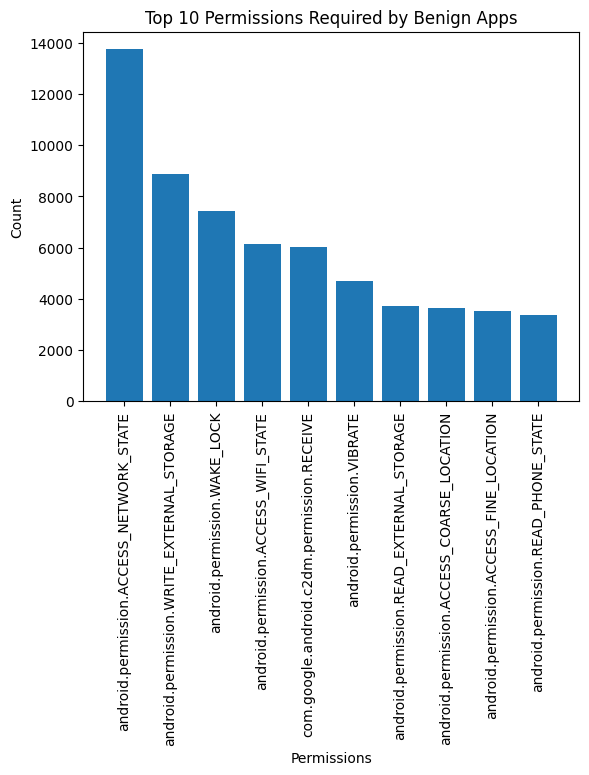

In [29]:
import pandas as pd
import matplotlib.pyplot as plt

# Read the dataset into a DataFrame
df = pd.read_csv('/content/Android_Malware.csv')

# Filter rows for benign apps and calculate the sum of permissions
benign_permissions_sum = df[df['Result'] == 0].sum(axis=0)

# Sort the permissions in descending order and select the top 10
top_10_permissions = benign_permissions_sum.sort_values(ascending=False)[1:11]

# Create a bar chart for the top 10 permissions
plt.bar(top_10_permissions.index, top_10_permissions.values)
plt.xticks(rotation=90)
plt.xlabel('Permissions')
plt.ylabel('Count')
plt.title('Top 10 Permissions Required by Benign Apps')
plt.show()

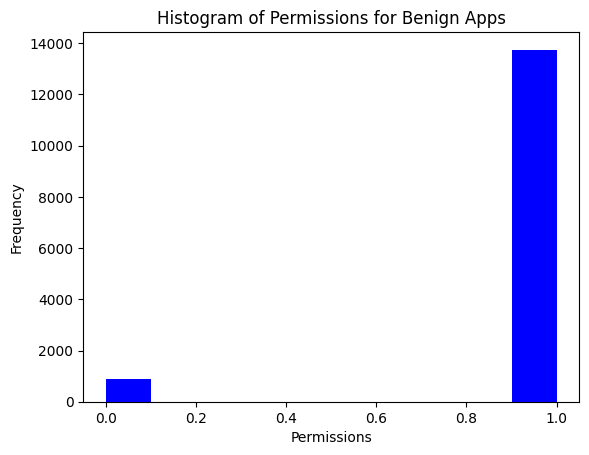

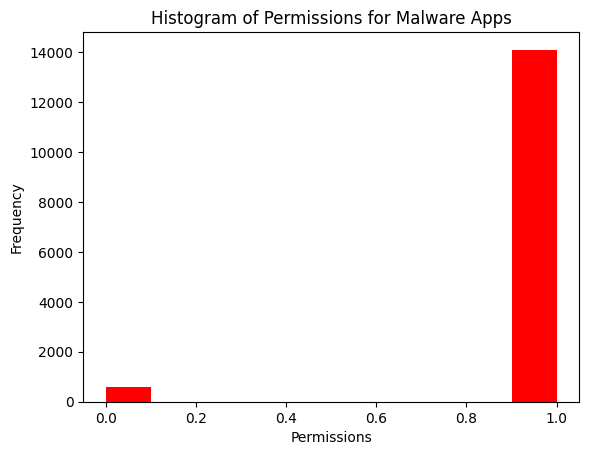

In [33]:
import pandas as pd
import matplotlib.pyplot as plt

# Read the dataset into a DataFrame
df = pd.read_csv('/content/Android_Malware.csv')

# Filter rows for benign apps and malware apps
benign_apps = df[df['Result'] == 0]
malware_apps = df[df['Result'] == 1]

# Plot histogram for benign apps
plt.hist(benign_apps['android.permission.ACCESS_NETWORK_STATE'], color='blue')
plt.title('Histogram of Permissions for Benign Apps')
plt.xlabel('Permissions')
plt.ylabel('Frequency')
plt.show()

# Plot histogram for malware apps
plt.hist(malware_apps['android.permission.ACCESS_NETWORK_STATE'], color='red')
plt.title('Histogram of Permissions for Malware Apps')
plt.xlabel('Permissions')
plt.ylabel('Frequency')
plt.show()

<Axes: title={'center': 'Malware Apps'}, xlabel='Permissions', ylabel='Count of apps'>

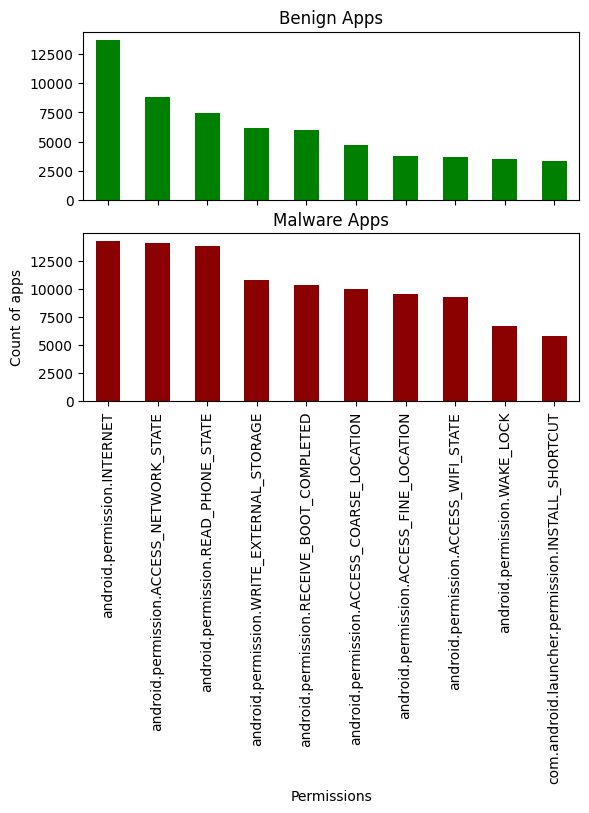

In [35]:
fig, axs =  plt.subplots(nrows=2, sharex=True)
pd.Series.sort_values(df[df.Result==0].sum(axis=0), ascending=False)[1:11].plot.bar(ax=axs[0], color="green", title="Benign Apps")
pd.Series.sort_values(df[df.Result==1].sum(axis=0), ascending=False)[1:11].plot.bar(ax=axs[1], color="darkred", title="Malware Apps", ylabel="Count of apps", xlabel="Permissions")

**Describe datasets**

In [36]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29332 entries, 0 to 29331
Data columns (total 87 columns):
 #   Column                                                                         Non-Null Count  Dtype
---  ------                                                                         --------------  -----
 0   android.permission.GET_ACCOUNTS                                                29332 non-null  int64
 1   com.sonyericsson.home.permission.BROADCAST_BADGE                               29332 non-null  int64
 2   android.permission.READ_PROFILE                                                29332 non-null  int64
 3   android.permission.MANAGE_ACCOUNTS                                             29332 non-null  int64
 4   android.permission.WRITE_SYNC_SETTINGS                                         29332 non-null  int64
 5   android.permission.READ_EXTERNAL_STORAGE                                       29332 non-null  int64
 6   android.permission.RECEIVE_SMS        

In [37]:
df_desc = df.describe()
df_desc

,android.permission.GET_ACCOUNTS,com.sonyericsson.home.permission.BROADCAST_BADGE,android.permission.READ_PROFILE,android.permission.MANAGE_ACCOUNTS,android.permission.WRITE_SYNC_SETTINGS,android.permission.READ_EXTERNAL_STORAGE,android.permission.RECEIVE_SMS,com.android.launcher.permission.READ_SETTINGS,android.permission.WRITE_SETTINGS,com.google.android.providers.gsf.permission.READ_GSERVICES,...,com.android.launcher.permission.UNINSTALL_SHORTCUT,com.sec.android.iap.permission.BILLING,com.htc.launcher.permission.UPDATE_SHORTCUT,com.sec.android.provider.badge.permission.WRITE,android.permission.ACCESS_NETWORK_STATE,com.google.android.finsky.permission.BIND_GET_INSTALL_REFERRER_SERVICE,com.huawei.android.launcher.permission.READ_SETTINGS,android.permission.READ_SMS,android.permission.PROCESS_INCOMING_CALLS,Result
count,29332.000000,29332.000000,29332.000000,29332.000000,29332.000000,29332.000000,29332.000000,29332.000000,29332.00000,29332.000000,...,29332.000000,29332.000000,29332.000000,29332.000000,29332.000000,29332.000000,29332.000000,29332.000000,29332.000000,29332.000000
mean,0.226033,0.034263,0.045888,0.013603,0.005762,0.171690,0.060071,0.014114,0.11080,0.043741,...,0.029660,0.003887,0.033445,0.034297,0.949032,0.023728,0.023387,0.051718,0.003648,0.501159
std,0.418268,0.181907,0.209247,0.115837,0.075688,0.377117,0.237622,0.117964,0.31389,0.204521,...,0.169652,0.062222,0.179798,0.181994,0.219937,0.152204,0.151133,0.221461,0.060289,0.500007
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,...,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,...,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,...,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
